# SQL - Анализ базы данных. Книжное дело

**ОПИСАНИЕ ПРОЕКТА:**

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

<span style="color:green">**Цель:**</span> 
Пронализировать базу данных, в которой находятся данные о книгах и сформулировать общие выводы по запуску нового продукта.

<span style="color:green">**План проекта:**</span> 
1. Подключение к базе данных
2. Изучение данных
3. Исследовательский анализ данных о книгах
   - 3.1 Посчитать сколько книг вышло после 1 января 2000 года
   - 3.2 Для каждой книги посчитать количество обзоров и среднюю оценку
   - 3.3 Определить издательство, которое выпустило наибольшее число книг толще 50 страниц(так мы исключим из анализа брошюры)
   - 3.4 Определить автора с самой высокой средней оценкой книг, будем учитывать только книги с 50-ю и более оценками
   - 3.5 Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок
4. Общие выводы и рекомендации

<span style="color:green">**Описание данных:**</span>

Информация о книгах, издательствах, авторах, а также пользовательские обзоры книг
База данных, содержащая таблицы: 

**books, authors, publishers, ratings и reviews**

1. Таблица **books** содержит данные о книгах:

- **book_id** — идентификатор книги;
- **author_id** — идентификатор автора;
- **title** — название книги;
- **num_pages** — количество страниц;
- **publication_date** — дата публикации книги;
- **publisher_id** — идентификатор издателя.

2. Таблица **authors** содержит данные об авторах:

- **author_id** — идентификатор автора;
- **author** — имя автора.

3. Таблица **publishers** содержит данные об издательствах:

- **publisher_id** — идентификатор издательства;
- **publisher** — название издательства;

4. Таблица **ratings** содержит данные о пользовательских оценках книг:

- **rating_id** — идентификатор оценки;
- **book_id** — идентификатор книги;
- **username** — имя пользователя, оставившего оценку;
- **rating** — оценка книги.

5. Таблица **reviews**  содержит данные о пользовательских обзорах:

- **review_id** — идентификатор обзора;
- **book_id** — идентификатор книги;
- **username** — имя автора обзора;
- **text** — текст обзора.


<span style="color:green">**Структура базы данных:**</span>

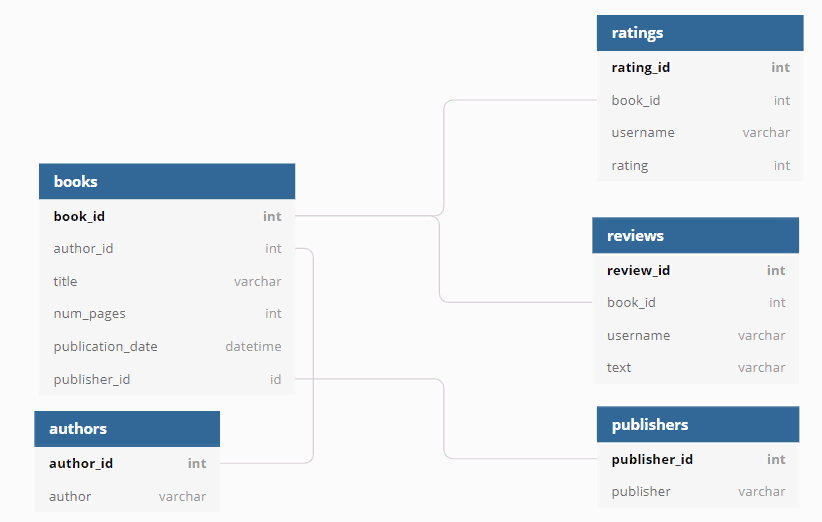

## Подключение к БД

In [10]:
# импортируем все необходимые для работы библиотеки
import pandas as pd
from sqlalchemy import text, create_engine
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth= 150

In [11]:
# устанавливаем параметры
db_config= {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-final-project-db'} # название базы данных


connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [19]:
# напишем функцию для выполнения запроса
def df_info(table):
    
    """ Функция для вывода общей информации о таблице в БД и первых 5-ти строк таблицы"""
    
    query = '''SELECT * FROM {} LIMIT 5'''.format(table)
    query1 = '''SELECT COUNT (*) FROM {}'''.format(table)
    df = pd.io.sql.read_sql(query, con= engine)
    df_shape_table= pd.io.sql.read_sql(query1, con= engine)
    display (df)
    display (df.info())
    print('\033[1m'+ f"Количество строк в таблице {table} составляет {df_shape_table.loc[0, 'count']}")
    print()


## Изучение данных

In [21]:
list= ['books','authors', 'publishers','ratings', 'reviews']
for i in list:
    print ('\033[1m'+ 'Общая информация о таблице', i)
    print('\033[0m')
    df_info(i)

Общая информация о таблице books



,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           5 non-null      int64 
 1   author_id         5 non-null      int64 
 2   title             5 non-null      object
 3   num_pages         5 non-null      int64 
 4   publication_date  5 non-null      object
 5   publisher_id      5 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 368.0+ bytes


None

Количество строк в таблице books составляет 1000

Общая информация о таблице authors



,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  5 non-null      int64 
 1   author     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


None

Количество строк в таблице authors составляет 636

Общая информация о таблице publishers



,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  5 non-null      int64 
 1   publisher     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


None

Количество строк в таблице publishers составляет 340

Общая информация о таблице ratings



,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  5 non-null      int64 
 1   book_id    5 non-null      int64 
 2   username   5 non-null      object
 3   rating     5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


None

Количество строк в таблице ratings составляет 6456

Общая информация о таблице reviews



,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  5 non-null      int64 
 1   book_id    5 non-null      int64 
 2   username   5 non-null      object
 3   text       5 non-null      object
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


None

Количество строк в таблице reviews составляет 2793



**Вывод:**
- Исследовали данные во всех 5-ти таблицах:
  - **books:** 1000 строк и 6 колонок
  - **uthors:** 636 строк и 2 колонки
  - **publishers:** 340 строк и 2 колонки
  - **ratings:** 6456 строк и 4 колонки
  - **reviews:** 2793 строки и 4 колонки
- Явных дубликатов нет
- Пропуски отсутствуют
- Названия столбцов записаны в соответствии со стилем "snake case" 

## Исследовательский анализ данных о книгах

### <span style="color:brown">Посчитаем сколько книг вышло после 1 января 2000 года</span> 

In [14]:
query= '''
          SELECT 
          COUNT(*)
          FROM books
          WHERE publication_date::date>= '01-01-2000'
       '''

df= pd.io.sql.read_sql(query, con= engine)

**Итак:** После 1-ого января 2000 года вышла 821 книга

### <span style="color:brown">Для каждой книги посчитаем количество обзоров и среднюю оценку</span> 

In [15]:
query= '''
          SELECT b.title,
          COUNT (DISTINCT rv.review_id), ROUND (avg(r.rating), 1) as avg_rating
          FROM reviews AS rv
           
          RIGHT JOIN books AS b ON rv.book_id= b.book_id
          LEFT JOIN ratings AS r ON b.book_id= r.book_id

          GROUP BY b.book_id
          ORDER BY avg_rating DESC
       '''

df= pd.io.sql.read_sql(query, con= engine)
df

,title,count,avg_rating
0,Crucial Conversations: Tools for Talking When Stakes Are High,2,5.0
1,The Walking Dead Book One (The Walking Dead #1-12),2,5.0
2,A Dirty Job (Grim Reaper #1),4,5.0
3,Geek Love,2,5.0
4,Homage to Catalonia,2,5.0
...,...,...,...
995,The Kitchen God's Wife,3,2.3
996,His Excellency: George Washington,2,2.0
997,Drowning Ruth,3,2.0
998,Junky,2,2.0


**Итак:** Мы получили таблицу с перечнем книг, где по каждой определено количество обзоров **count** и средняя оценка ***avg_rating**

### <span style="color:brown">Определить издательство, которое выпустило наибольшее число книг толще 50 страниц</span> 

Условие "Книги толще 50 страниц" поможет нам исключить из анализа брошюры

In [16]:
query= '''
          SELECT p.publisher,
          COUNT(b.book_id)
          FROM publishers AS p
           
          JOIN BOOKS AS b ON p.publisher_id= b.publisher_id
          WHERE b.num_pages> 50

          GROUP BY p.publisher_id
          ORDER BY count(b.book_id) DESC
          LIMIT 5
       '''

df= pd.io.sql.read_sql(query, con= engine)
df

,publisher,count
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Bantam,19


**Итак:** Наибольшее количество книг выпустило издательство **Penguin Books, в количестве 42 книги**.

### <span style="color:brown">Определить автора с самой высокой средней оценкой книг</span> 

Будем учитывать только книги с 50-ю и более оценками

In [17]:
query= '''
          SELECT a.author,
          AVG(r.rating) avg_rating
          FROM authors AS a
           
          JOIN books AS b ON a.author_id= b.author_id
          JOIN ratings AS r ON b.book_id= r.book_id
          WHERE b.book_id IN
                            (SELECT b.book_id
                             FROM books AS b
      
          JOIN ratings AS r ON b.book_id= r.book_id
          
          GROUP BY b.book_id
          HAVING count(r.rating_id)>= 50)
          
          GROUP BY a.author
          ORDER BY avg_rating desc
          LIMIT 5
       '''

df= pd.io.sql.read_sql(query, con= engine)
df

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287097
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.246914
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645


**Итак:** Самый высокий рейтинг **4,3** принадлежит автору серии книг о **Гарри Поттере Джоан Кэтлин Роулинг**. 

### <span style="color:brown">Посчитаем среднее количество обзоров от пользователей, которые поставили больше 48 оценок</span> 

In [18]:
query= '''
          WITH users_more_48 AS
                              (SELECT r.username
                               FROM ratings r
  
          GROUP BY r.username
          HAVING (count(r.rating_id)> 48))
           
          SELECT avg(t.count) AS avg_review
          FROM
              (SELECT count(rv.review_id) AS count
               FROM reviews rv
               WHERE rv.username in
              (SELECT *
               FROM users_more_48)
   
          GROUP BY rv.username) AS t
       '''

df= pd.io.sql.read_sql(query, con= engine)
df

,avg_review
0,24.0


**Итак:** Пользователи поставившие **более 48 оценок**, в среднем, написали **24 обзора**. 

## Общие выводы

**В проекте проанализировали базу данных сервиса чтения книг:**

- Исследовали данные во всех 5-ти таблицах:
  - **books:** 1000 строк и 6 колонок
  - **uthors:** 636 строк и 2 колонки
  - **publishers:** 340 строк и 2 колонки
  - **ratings:** 6456 строк и 4 колонки
  - **reviews:** 2793 строки и 4 колонки
- Выяснили:
  - Явных дубликатов нет
  - Пропуски отсутствуют
  - Названия столбцов записаны в соответствии со стилем "snake case" 

- В процессе исследовательского анализа БД книг выяснили:

1. После 01-01-2000г. вышла **821 книга**
2. Для каждой книги определили **количество обзоров и среднюю оценку**
3. Наибольшее количество книг выпустило издательство **Penguin Books, в количестве 42 книги**.
4. Самый **высокий рейтинг 4,3** принадлежит автору серии книг о **Гарри Поттере Джоан Кэтлин Роулинг**.
5. Пользователи поставившие более 48 оценок, в среднем, написали **24 обзора**.

**Рекомендации**
- Для того, чтобы увеличить выручку и повысить свою популярность необходимо брать лучшие практики и опыт компаний, которые уже прошли трудный путь стартаперов и успешно развивают свой бизнес, например вот здесь:
https://texterra.ru/blog/knigi-rakety-labkovskiy-i-chem-prodazhi-na-wildberries-otlichayutsya-ot-prodazh-na-ozon.html